In [103]:
import sys
sys.path.insert(0, '../scripts')
sys.path.insert(0, '../data/database')
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

engine =  create_engine('sqlite:///../data/database/happycows.db')

In [104]:
with engine.connect() as con:
    #weather = pd.read_sql_table('weather', con)
    milk_volumes = pd.read_sql_table('milk_volume', con)
    print(milk_volumes.head())
    milk_volumes.index = milk_volumes['date']

                 date  animal_id  average_flow  max_flow  milk_weight
0 2015-07-06 04:01:50       1933           3.0       3.9         19.3
1 2015-07-06 04:01:51       2000           4.5       5.3         12.3
2 2015-07-06 04:01:51       2027           3.8       4.8         19.1
3 2015-07-06 04:01:52        200           3.9       5.0         14.9
4 2015-07-06 04:01:52       2017           4.4       7.9         16.9


In [125]:
median_milk_production = milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.month).median()
mean_milk_production = milk_volumes['milk_weight'].groupby(milk_volumes['date'].dt.month).mean()

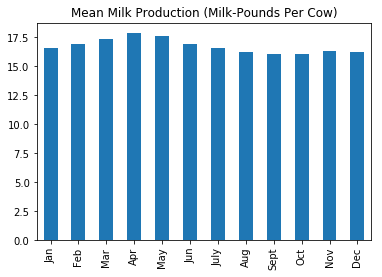

In [149]:
median_milk_production.plot.bar()
plt.title("Median Milk Production (Milk-Pounds Per Cow)")
plt.xlabel(s="")
plt.xticks( range(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec') )
plt.show()

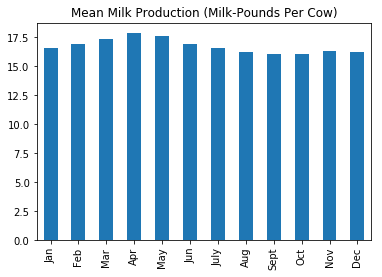

In [150]:
mean_milk_production.plot.bar()
plt.title("Mean Milk Production (Milk-Pounds Per Cow)")
plt.xlabel(s="")
plt.xticks( range(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec') )
plt.show()